In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('../quality_check_measurements.csv')
data = data.drop(columns=['runName']).transpose()
data

,0
0,1863
1,945
2,615
3,956
4,721
...,...
95,702
96,813
97,873
98,713


## 01: Boxplot und Lageparameter

In [3]:
data1 = data

In [4]:
# Lageparameter sind hier zu entnehmen
data1.describe()

,0
count,100.000000
mean,734.380000
std,147.654236
min,580.000000
25%,655.500000
50%,713.000000
75%,769.750000
max,1863.000000


durchschnittliche Laufzeit (ms)


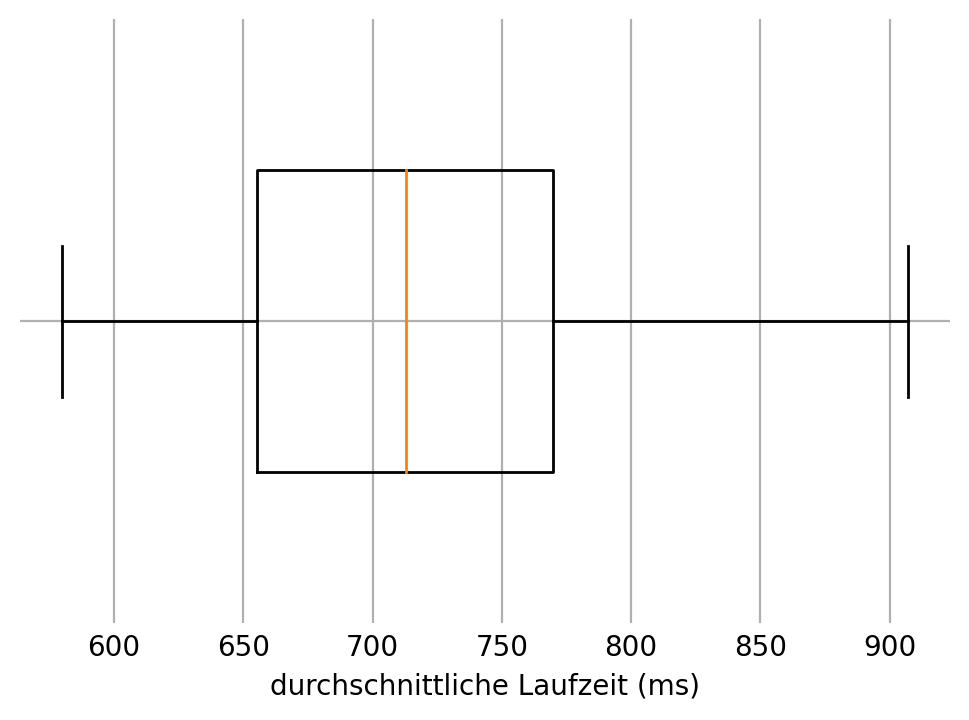

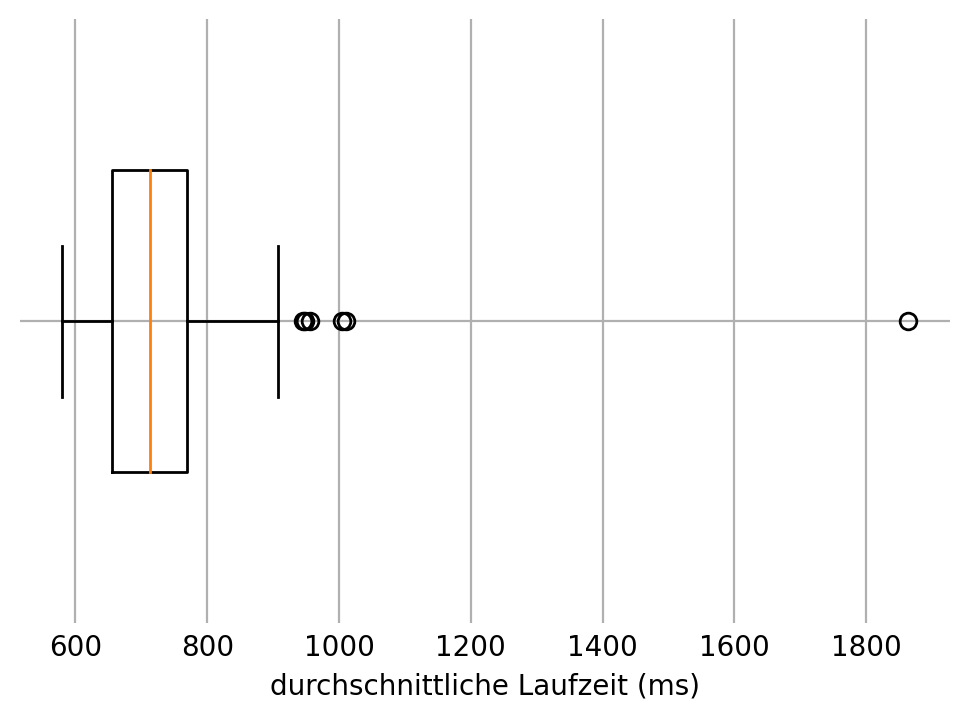

In [5]:
fig, ax = plt.subplots(figsize=(6,4), dpi=200)
fig1, ax1 = plt.subplots(figsize=(6,4), dpi=200)

# TODO: gucken wie extrem die ausreißer sind bei showfliers -> Eigendlich ganz sinnvoll
boxplot = ax.boxplot(data1, notch=False, showfliers=False, patch_artist=False, vert=False ,widths=0.5, labels=[""])
boxplot_with_fliers = ax1.boxplot(data1, notch=False, showfliers=True, patch_artist=False, vert=False ,widths=0.5, labels=[""])

ax.set(xlabel='durchschnittliche Laufzeit (ms)')
ax1.set(xlabel='durchschnittliche Laufzeit (ms)')

print(ax.get_xlabel())
ax.grid()
ax1.grid()

for spine in ax.spines.values():
    spine.set_visible(False)

for spine in ax1.spines.values():
    spine.set_visible(False)

ax.tick_params(axis='both', length=0)
ax1.tick_params(axis='both', length=0)

fig.savefig('quality_check_boxplot.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')
fig1.savefig('quality_check_boxplot_with_fliers.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')

## 02:

In [6]:
data2 = data

(array([6., 4., 2., 3., 5., 5., 6., 7., 5., 6., 7., 1., 5., 4., 9., 6., 0.,
        3., 2., 1., 4., 1., 1., 0., 0., 1., 0., 0., 2., 1., 0., 0., 0., 2.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 580.  ,  592.83,  605.66,  618.49,  631.32,  644.15,  656.98,
         669.81,  682.64,  695.47,  708.3 ,  721.13,  733.96,  746.79,
         759.62,  772.45,  785.28,  798.11,  810.94,  823.77,  836.6 ,
         849.43,  862.26,  875.09,  887.92,  900.75,  913.58,  926.41,
         939.24,  952.07,  964.9 ,  977.73,  990.56, 1003.39, 1016.22,
        1029.05, 1041.88, 1054.71, 1067.54, 1080.37, 1093.2 , 1106.03,
        1118.86, 1131.69, 1144.52, 1157.35, 1170.18, 1183.01, 1195.84,
        1208.67, 1221.5 , 1234.33, 1247.16, 1259.99, 

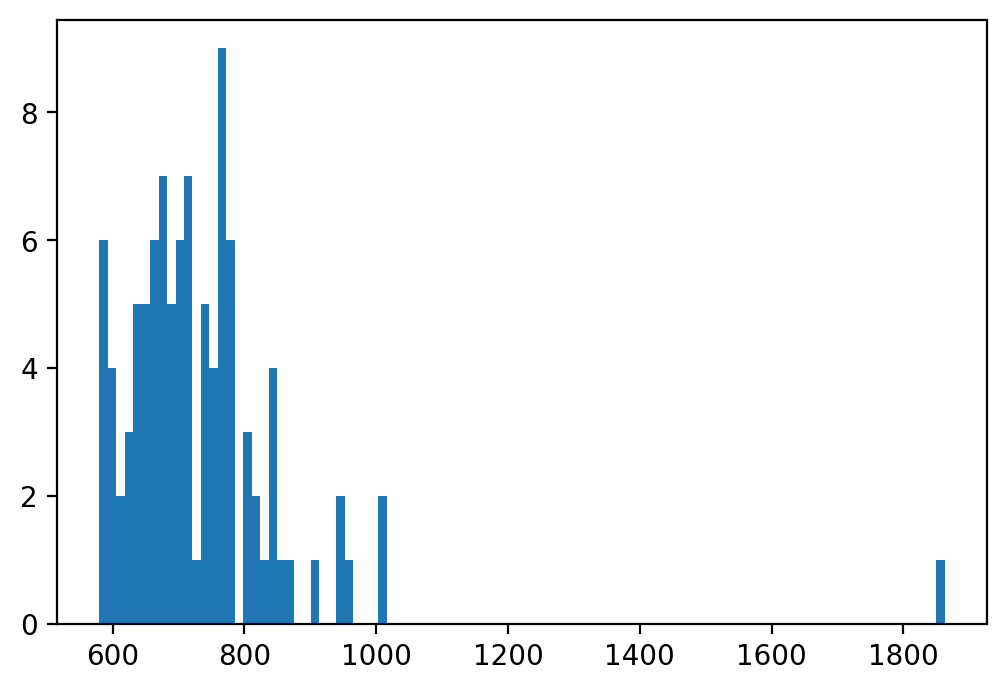

In [7]:
fig, ax = plt.subplots(figsize=(6,4), dpi=200)
ax.hist(data2, bins=100)